In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input
from keras.layers import Conv2D, MaxPool2D,Flatten
from keras.utils import to_categorical

In [ ]:
def detect_face(img):
    img = img[70:195,78:172]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (50, 50))
    return img

In [ ]:
dataset_folder = "dataset/"

names = []
images = []
for folder in os.listdir(dataset_folder):
    files = os.listdir(os.path.join(dataset_folder, folder))[:150]
    for i, name in enumerate(files):
        if name.find(".jpg") > -1 :
            img = cv2.imread(os.path.join(dataset_folder + folder, name))
            img = detect_face(img) # detect face using mtcnn and crop to 100x100
            if img is not None :
                images.append(img)
                names.append(folder)

In [ ]:
print("Jumlah Gambar :", len(names))

Jumlah Gambar : 153


In [ ]:
def img_augmentation(img):
    h, w = img.shape
    center = (w // 2, h // 2)
    M_rot_5 = cv2.getRotationMatrix2D(center, 5, 1.0)
    M_rot_neg_5 = cv2.getRotationMatrix2D(center, -5, 1.0)
    M_rot_10 = cv2.getRotationMatrix2D(center, 10, 1.0)
    M_rot_neg_10 = cv2.getRotationMatrix2D(center, -10, 1.0)
    M_trans_3 = np.float32([[1, 0, 3], [0, 1, 0]])
    M_trans_neg_3 = np.float32([[1, 0, -3], [0, 1, 0]])
    M_trans_6 = np.float32([[1, 0, 6], [0, 1, 0]])
    M_trans_neg_6 = np.float32([[1, 0, -6], [0, 1, 0]])
    M_trans_y3 = np.float32([[1, 0, 0], [0, 1, 3]])
    M_trans_neg_y3 = np.float32([[1, 0, 0], [0, 1, -3]])
    M_trans_y6 = np.float32([[1, 0, 0], [0, 1, 6]])
    M_trans_neg_y6 = np.float32([[1, 0, 0], [0, 1, -6]])

    imgs = []
    imgs.append(cv2.warpAffine(img, M_rot_5, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_rot_neg_5, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_rot_10, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_rot_neg_10, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_y3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_y3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_y6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_y6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.add(img, 10))
    imgs.append(cv2.add(img, 30))
    imgs.append(cv2.add(img, -10))
    imgs.append(cv2.add(img, -30))
    imgs.append(cv2.add(img, 15))
    imgs.append(cv2.add(img, 45))
    imgs.append(cv2.add(img, -15))
    imgs.append(cv2.add(img, -45))

    return imgs

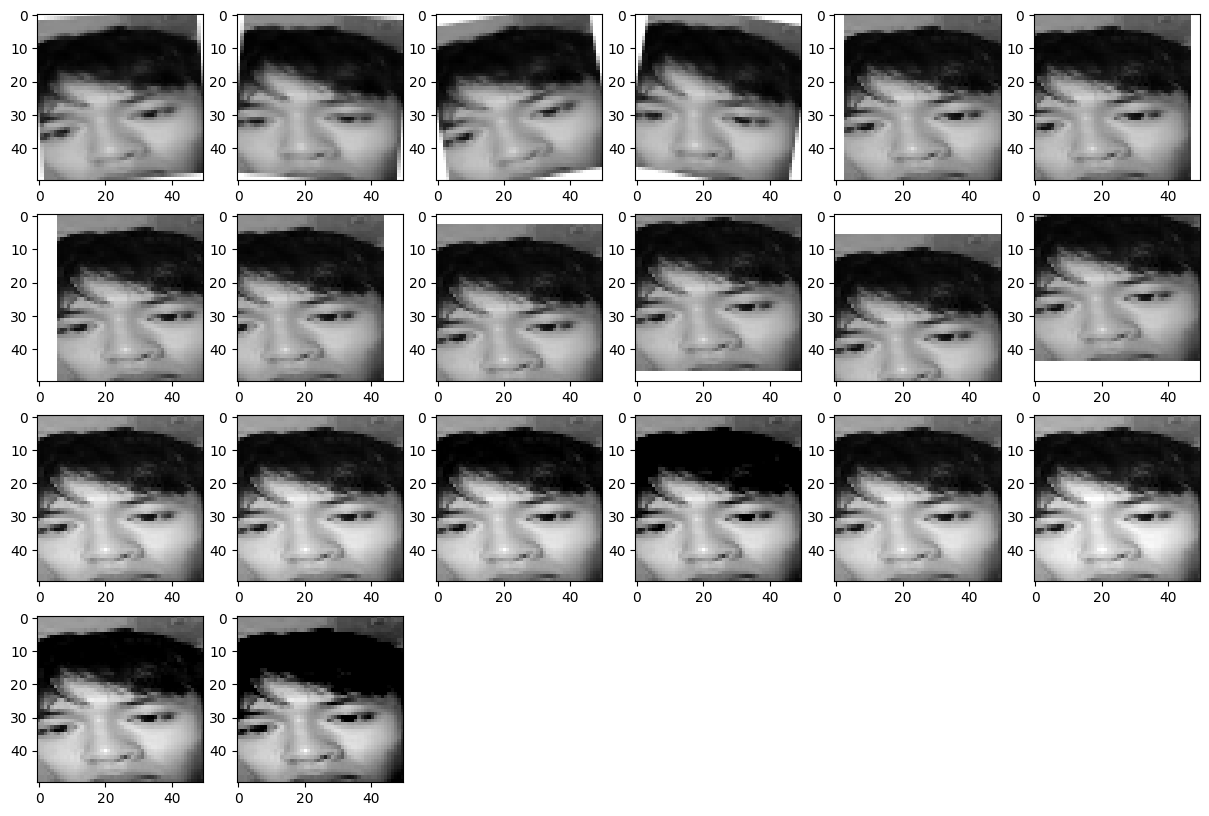

In [ ]:
img_test = images[0]

augmented_image_test = img_augmentation(img_test)

plt.figure(figsize=(15,10))
for i, img in enumerate(augmented_image_test):
    plt.subplot(4,6,i+1)
    plt.imshow(img, cmap="gray")
plt.show()

In [ ]:
augmented_images = []
augmented_names = []
for i, img in enumerate(images):
    try :
        augmented_images.extend(img_augmentation(img))
        augmented_names.extend([names[i]] * 20)
    except :
        print(i)

In [ ]:
len(augmented_images), len(augmented_names)

(3060, 3060)

In [ ]:
images.extend(augmented_images)
names.extend(augmented_names)

In [ ]:
len(images), len(names)

(3213, 3213)

In [ ]:
unique, counts = np.unique(names, return_counts = True)

for item in zip(unique, counts):
    print(item)

('Mirza Muhamad Alghivary', 1071)
('Muhamad Fajar Yudhistira Herjanto', 1071)
('Muhammad Nurfathullah', 1071)


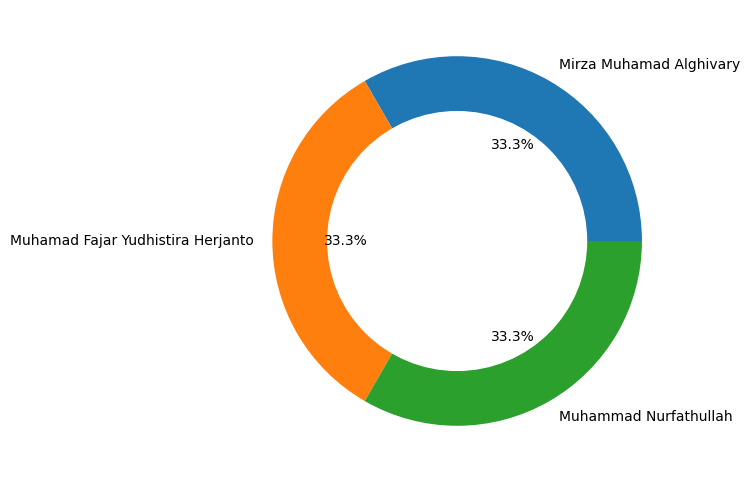

In [ ]:
def print_data(label_distr, label_name):
    plt.figure(figsize=(12,6))

    my_circle = plt.Circle( (0,0), 0.7, color='white')
    plt.pie(label_distr, labels=label_name, autopct='%1.1f%%')
    plt.gcf().gca().add_artist(my_circle)
    plt.show()

unique = np.unique(names)
label_distr = {i:names.count(i) for i in names}.values()
print_data(label_distr, unique)

In [ ]:
n = 1000

def randc(labels, l):
    return np.random.choice(np.where(np.array(labels) == l)[0], n, replace=False)

mask = np.hstack([randc(names, l) for l in np.unique(names)])

In [ ]:
names = [names[m] for m in mask]
images = [images[m] for m in mask]

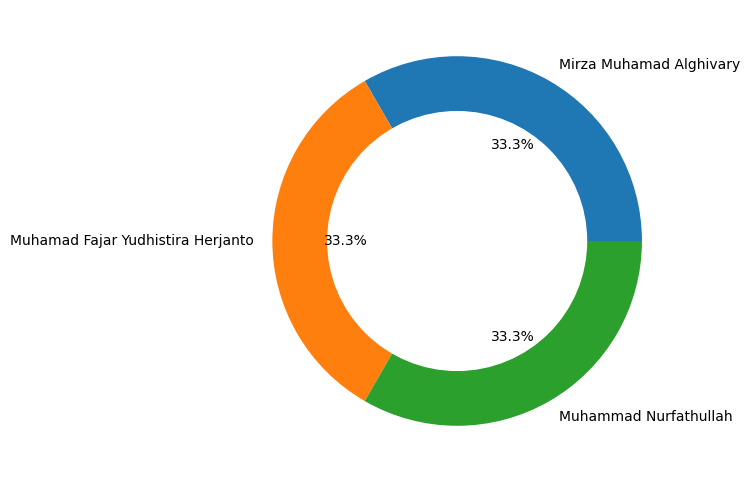

In [ ]:
label_distr = {i:names.count(i) for i in names}.values()
print_data(label_distr, unique)

In [ ]:
len(names)

3000

In [ ]:
le = LabelEncoder()

le.fit(names)

labels = le.classes_

name_vec = le.transform(names)

categorical_name_vec = to_categorical(name_vec)

In [ ]:
print("number of class :", len(labels))
print(labels)

number of class : 3
['Mirza Muhamad Alghivary' 'Muhamad Fajar Yudhistira Herjanto'
 'Muhammad Nurfathullah']


In [ ]:
print(name_vec)

[0 0 0 ... 2 2 2]


In [ ]:
print(categorical_name_vec)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np.array(images, dtype=np.float32),
                                                    np.array(categorical_name_vec),
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape,  y_test.shape)

(2400, 50, 50) (2400, 3) (600, 50, 50) (600, 3)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [ ]:
x_train.shape, x_test.shape

((2400, 50, 50, 1), (600, 50, 50, 1))

In [ ]:
def cnn_model(input_shape):
    model = Sequential()

    model.add(Conv2D(64,
                    (3,3),
                    padding="valid",
                    activation="relu",
                    input_shape=input_shape))
    model.add(Conv2D(64,
                    (3,3),
                    padding="valid",
                    activation="relu",
                    input_shape=input_shape))

    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(128,
                    (3,3),
                    padding="valid",
                    activation="relu"))
    model.add(Conv2D(128,
                    (3,3),
                    padding="valid",
                    activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(128, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(len(labels)))  # equal to number of classes
    model.add(Activation("softmax"))

    model.summary()

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])

    return model

In [ ]:
input_shape = x_train[0].shape

EPOCHS = 10
BATCH_SIZE = 32

model = cnn_model(input_shape)

history = model.fit(x_train,
                    y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    shuffle=True,
                    validation_split=0.15
                    )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 19, 19, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 128)        0         
 2D)                                                    

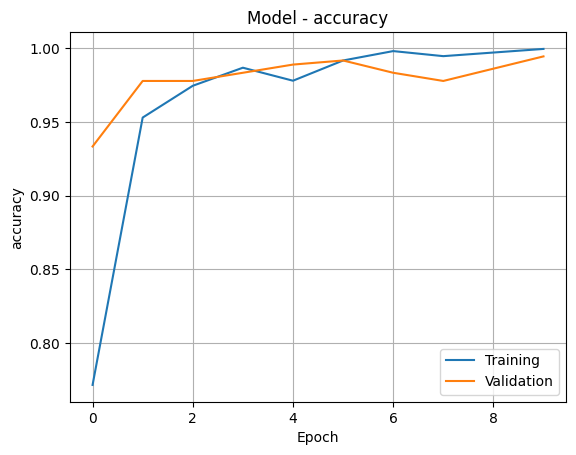

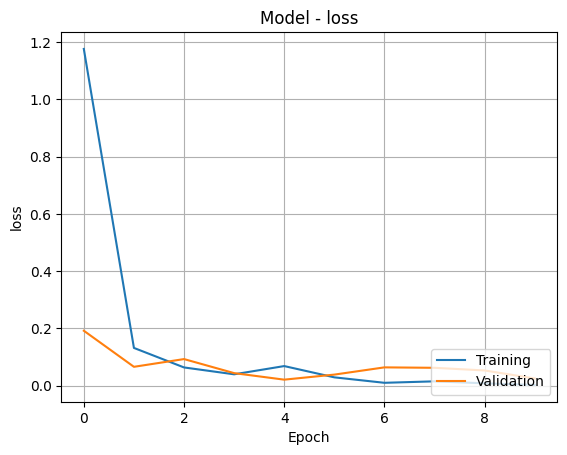

In [ ]:
def evaluate_model_(history):
    names = [['accuracy', 'val_accuracy'],
             ['loss', 'val_loss']]
    for name in names :
        fig1, ax_acc = plt.subplots()
        plt.plot(history.history[name[0]])
        plt.plot(history.history[name[1]])
        plt.xlabel('Epoch')
        plt.ylabel(name[0])
        plt.title('Model - ' + name[0])
        plt.legend(['Training', 'Validation'], loc='lower right')
        plt.grid()
        plt.show()

evaluate_model_(history)

In [ ]:
model.save("model-cnn-facerecognition.h5")

In [ ]:
y_pred=model.predict(x_test)

19/19 [==============================] - 4s 205ms/step


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 8))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

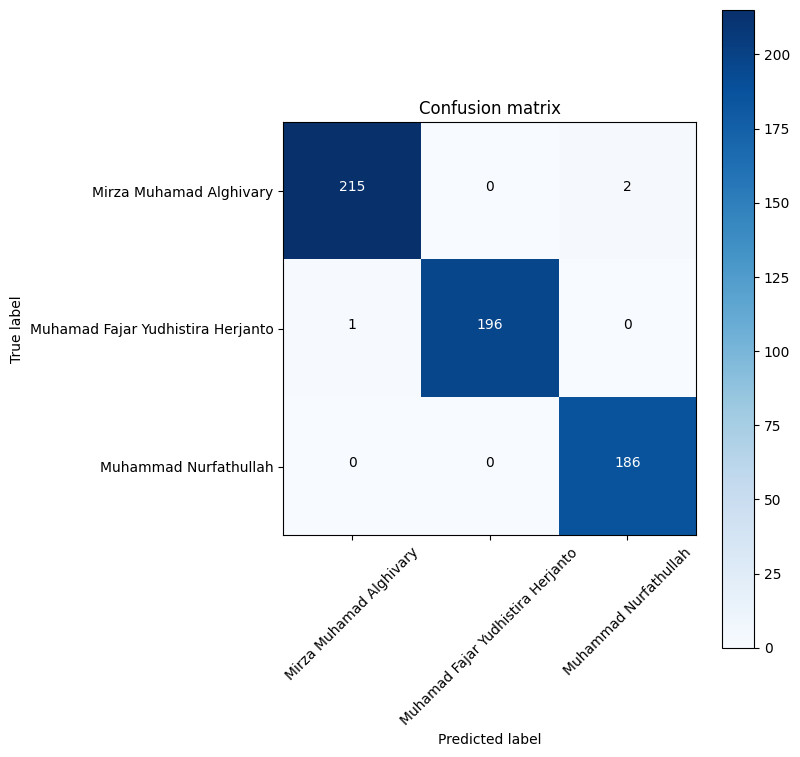

In [ ]:

cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)


plot_confusion_matrix(cnf_matrix, classes=labels,normalize=False,
                      title='Confusion matrix')

In [ ]:
print(classification_report(y_test.argmax(axis=1),
                            y_pred.argmax(axis=1),
                            target_names=labels))

                                   precision    recall  f1-score   support

          Mirza Muhamad Alghivary       1.00      0.99      0.99       217
Muhamad Fajar Yudhistira Herjanto       1.00      0.99      1.00       197
            Muhammad Nurfathullah       0.99      1.00      0.99       186

                         accuracy                           0.99       600
                        macro avg       0.99      1.00      1.00       600
                     weighted avg       1.00      0.99      1.00       600



1/1 [==============================] - 0s 108ms/step
['Muhamad Fajar Yudhistira Herjanto'] (100.00 %)
1/1 [==============================] - 0s 28ms/step
['Muhamad Fajar Yudhistira Herjanto'] (100.00 %)
1/1 [==============================] - 0s 32ms/step
['Muhamad Fajar Yudhistira Herjanto'] (100.00 %)
1/1 [==============================] - 0s 35ms/step
['Muhamad Fajar Yudhistira Herjanto'] (99.95 %)
1/1 [==============================] - 0s 42ms/step
['Muhamad Fajar Yudhistira Herjanto'] (100.00 %)
1/1 [==============================] - 0s 33ms/step
['Muhamad Fajar Yudhistira Herjanto'] (100.00 %)
1/1 [==============================] - 0s 29ms/step
['Muhamad Fajar Yudhistira Herjanto'] (99.92 %)
1/1 [==============================] - 0s 28ms/step
['Muhamad Fajar Yudhistira Herjanto'] (96.43 %)
1/1 [==============================] - 0s 32ms/step
['Muhamad Fajar Yudhistira Herjanto'] (100.00 %)
1/1 [==============================] - 0s 29ms/step
['Muhamad Fajar Yudhistira Herjanto'] (99

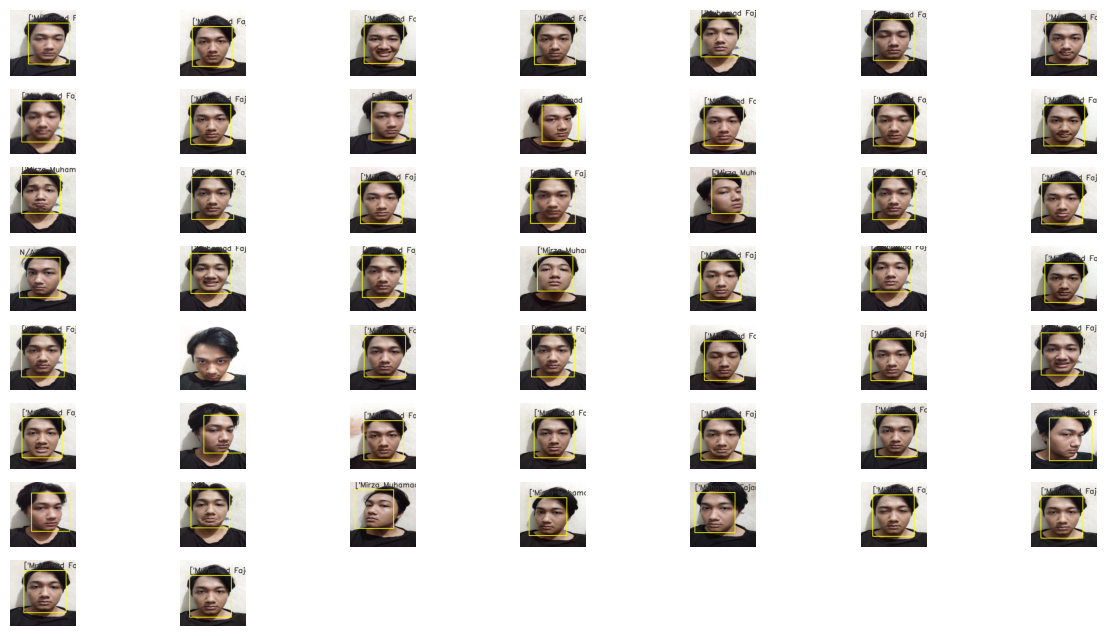

In [ ]:
import cv2
import os
from keras.models import load_model
from google.colab.patches import cv2_imshow

# Load Haar Cascade model for face detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load Keras CNN model for face recognition
model = load_model("model-cnn-facerecognition.h5")

# Set the path to the directory containing the images
image_dir = "dataset/Muhamad Fajar Yudhistira Herjanto"

yes_predict = 0
not_predict = 0
na_predict = 0

# Create a new figure with 4 rows and 6 columns
fig=plt.figure(figsize=(15, 8))

# Loop through each file in the directory
for i, filename in enumerate(os.listdir(image_dir)):

    # Check if the file is an image file
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):

        # Load the image from file
        img = cv2.imread(os.path.join(image_dir, filename))

        # Convert image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces in the grayscale image using Haar Cascade classifier
        faces = face_cascade.detectMultiScale(gray, 1.1, 5)

        # Loop through each detected face
        for (x, y, w, h) in faces:

            # Crop the detected face from the image
            face_img = gray[y:y+h, x:x+w]

            # Resize the face image to fit the input size of the Keras model
            face_img = cv2.resize(face_img, (50, 50))

            # Reshape the face image to match the input shape of the Keras model
            face_img = face_img.reshape(1, 50, 50, 1)

            # Make prediction using the Keras model
            result = model.predict(face_img)
            idx = result.argmax(axis=1)
            confidence = result.max(axis=1)*100

            # If the confidence level is higher than 80%, label the face with the recognized person's name
            if confidence > 80:
                label_text = "%s (%.2f %%)" % (labels[idx], confidence)
                print(label_text)
                if str(labels[idx]).strip('[]').strip() == "'Muhamad Fajar Yudhistira Herjanto'":
                    yes_predict += 1
                else:
                    not_predict += 1
            else:
                label_text = "N/A"
                print(label_text)
                na_predict += 1

            # Draw a rectangle around the detected face and label it with the recognized person's name
            img = cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,255), 2)
            img = cv2.putText(img, label_text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (50,50,50), 2)

        # Display the output image using subplot
        plt.subplot(8,7,i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")

cv2.destroyAllWindows()
total = len([f for f in os.listdir(image_dir) if f.endswith(".jpg") or f.endswith(".jpeg") or f.endswith(".png")])
akurasi = yes_predict/total*100
print("Jumlah gambar yang terprediksi tepat:",yes_predict)
print("Jumlah gambar yang salah terprediksi:",not_predict)
print("Jumlah gambar yang gagal terprediksi:",na_predict)
print("Akurasi prediksi gambar :",round(akurasi, 2) ,"%")

1/1 [==============================] - 0s 102ms/step
['Muhammad Nurfathullah'] (99.97 %)
1/1 [==============================] - 0s 36ms/step
['Muhammad Nurfathullah'] (99.79 %)
1/1 [==============================] - 0s 29ms/step
['Muhammad Nurfathullah'] (99.83 %)
1/1 [==============================] - 0s 30ms/step
['Muhammad Nurfathullah'] (99.93 %)
1/1 [==============================] - 0s 31ms/step
['Muhammad Nurfathullah'] (97.18 %)
1/1 [==============================] - 0s 29ms/step
['Muhammad Nurfathullah'] (99.99 %)
1/1 [==============================] - 0s 30ms/step
['Muhammad Nurfathullah'] (99.98 %)
1/1 [==============================] - 0s 36ms/step
N/A
1/1 [==============================] - 0s 29ms/step
['Muhammad Nurfathullah'] (82.98 %)
1/1 [==============================] - 0s 31ms/step
['Muhammad Nurfathullah'] (99.89 %)
1/1 [==============================] - 0s 30ms/step
['Muhammad Nurfathullah'] (92.05 %)
1/1 [==============================] - 0s 31ms/step
['Muhammad 

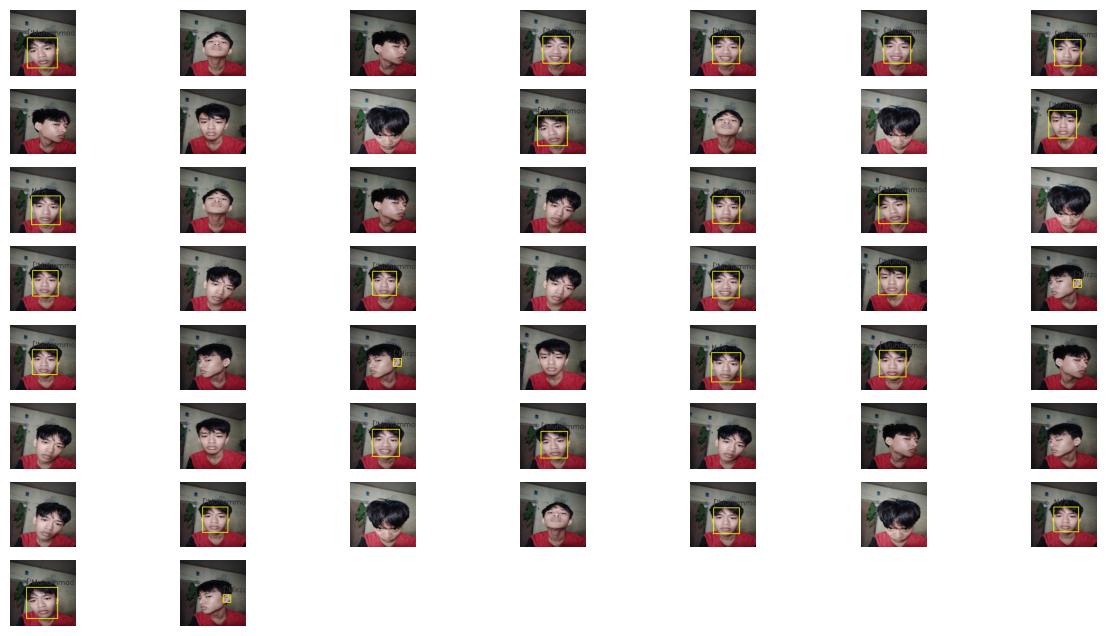

In [ ]:
import cv2
import os
from keras.models import load_model
from google.colab.patches import cv2_imshow

# Load Haar Cascade model for face detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load Keras CNN model for face recognition
model = load_model("model-cnn-facerecognition.h5")

# Set the path to the directory containing the images
image_dir = "dataset/Muhammad Nurfathullah"

yes_predict = 0
not_predict = 0
na_predict = 0

# Create a new figure with 4 rows and 6 columns
fig=plt.figure(figsize=(15, 8))

# Loop through each file in the directory
for i, filename in enumerate(os.listdir(image_dir)):

    # Check if the file is an image file
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):

        # Load the image from file
        img = cv2.imread(os.path.join(image_dir, filename))

        # Convert image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces in the grayscale image using Haar Cascade classifier
        faces = face_cascade.detectMultiScale(gray, 1.1, 5)

        # Loop through each detected face
        for (x, y, w, h) in faces:

            # Crop the detected face from the image
            face_img = gray[y:y+h, x:x+w]

            # Resize the face image to fit the input size of the Keras model
            face_img = cv2.resize(face_img, (50, 50))

            # Reshape the face image to match the input shape of the Keras model
            face_img = face_img.reshape(1, 50, 50, 1)

            # Make prediction using the Keras model
            result = model.predict(face_img)
            idx = result.argmax(axis=1)
            confidence = result.max(axis=1)*100

            # If the confidence level is higher than 80%, label the face with the recognized person's name
            if confidence > 80:
                label_text = "%s (%.2f %%)" % (labels[idx], confidence)
                print(label_text)
                if str(labels[idx]).strip('[]').strip() == "'Muhammad Nurfathullah'":
                    yes_predict += 1
                else:
                    not_predict += 1
            else:
                label_text = "N/A"
                print(label_text)
                na_predict += 1

            # Draw a rectangle around the detected face and label it with the recognized person's name
            img = cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,255), 2)
            img = cv2.putText(img, label_text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (50,50,50), 2)

        # Display the output image using subplot
        plt.subplot(8,7,i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")

cv2.destroyAllWindows()
total = len([f for f in os.listdir(image_dir) if f.endswith(".jpg") or f.endswith(".jpeg") or f.endswith(".png")])
akurasi = yes_predict/total*100
print("Jumlah gambar yang terprediksi tepat:",yes_predict)
print("Jumlah gambar yang salah terprediksi:",not_predict)
print("Jumlah gambar yang gagal terprediksi:",na_predict)
print("Akurasi prediksi gambar :",round(akurasi, 2) ,"%")

1/1 [==============================] - 0s 350ms/step
['Mirza Muhamad Alghivary'] (100.00 %)
1/1 [==============================] - 0s 98ms/step
['Mirza Muhamad Alghivary'] (99.97 %)
1/1 [==============================] - 0s 179ms/step
['Mirza Muhamad Alghivary'] (99.97 %)
1/1 [==============================] - 0s 65ms/step
['Mirza Muhamad Alghivary'] (96.54 %)
1/1 [==============================] - 0s 33ms/step
['Mirza Muhamad Alghivary'] (100.00 %)
1/1 [==============================] - 0s 34ms/step
['Mirza Muhamad Alghivary'] (100.00 %)
1/1 [==============================] - 0s 33ms/step
['Mirza Muhamad Alghivary'] (99.96 %)
1/1 [==============================] - 0s 33ms/step
['Mirza Muhamad Alghivary'] (100.00 %)
1/1 [==============================] - 0s 34ms/step
['Mirza Muhamad Alghivary'] (100.00 %)
1/1 [==============================] - 0s 32ms/step
['Mirza Muhamad Alghivary'] (100.00 %)
1/1 [==============================] - 0s 31ms/step
['Mirza Muhamad Alghivary'] (100.00 %)
1

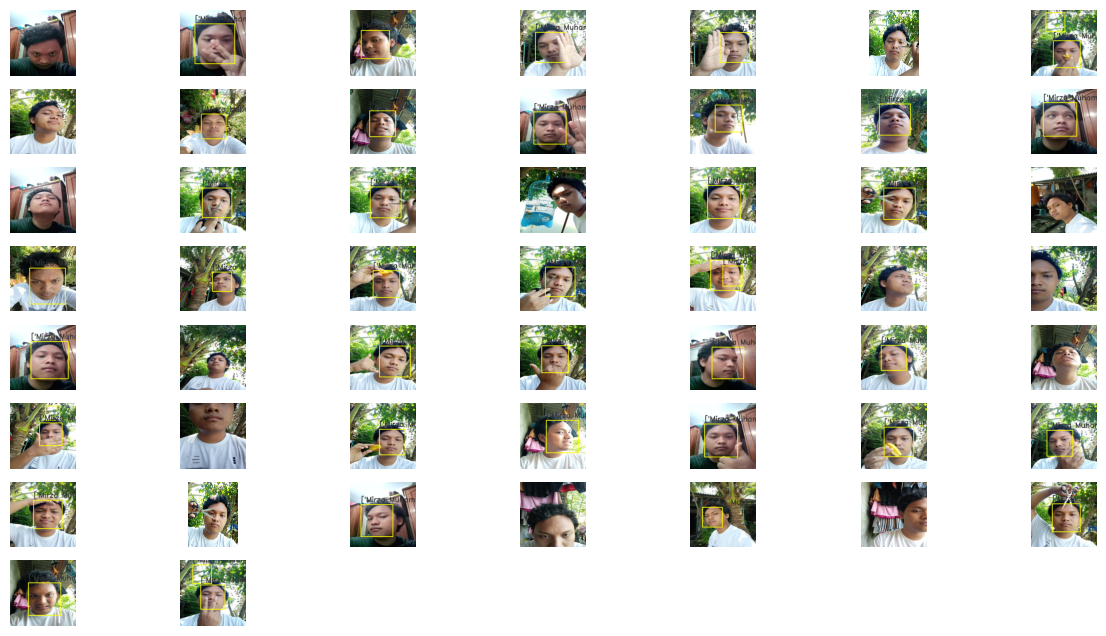

In [ ]:
import cv2
import os
from keras.models import load_model
from google.colab.patches import cv2_imshow

# Load Haar Cascade model for face detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load Keras CNN model for face recognition
model = load_model("model-cnn-facerecognition.h5")

# Set the path to the directory containing the images
image_dir = "dataset/Mirza Muhamad Alghifary"

yes_predict = 0
not_predict = 0
na_predict = 0

# Create a new figure with 4 rows and 6 columns
fig=plt.figure(figsize=(15, 8))

# Loop through each file in the directory
for i, filename in enumerate(os.listdir(image_dir)):

    # Check if the file is an image file
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):

        # Load the image from file
        img = cv2.imread(os.path.join(image_dir, filename))

        # Convert image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces in the grayscale image using Haar Cascade classifier
        faces = face_cascade.detectMultiScale(gray, 1.1, 5)

        # Loop through each detected face
        for (x, y, w, h) in faces:

            # Crop the detected face from the image
            face_img = gray[y:y+h, x:x+w]

            # Resize the face image to fit the input size of the Keras model
            face_img = cv2.resize(face_img, (50, 50))

            # Reshape the face image to match the input shape of the Keras model
            face_img = face_img.reshape(1, 50, 50, 1)

            # Make prediction using the Keras model
            result = model.predict(face_img)
            idx = result.argmax(axis=1)
            confidence = result.max(axis=1)*100

            # If the confidence level is higher than 80%, label the face with the recognized person's name
            if confidence > 80:
                label_text = "%s (%.2f %%)" % (labels[idx], confidence)
                print(label_text)
                if str(labels[idx]).strip('[]').strip() == "'Mirza Muhamad Alghivary'":
                    yes_predict += 1
                else:
                    not_predict += 1
            else:
                label_text = "N/A"
                print(label_text)
                na_predict += 1

            # Draw a rectangle around the detected face and label it with the recognized person's name
            img = cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,255), 2)
            img = cv2.putText(img, label_text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (50,50,50), 2)

        # Display the output image using subplot
        plt.subplot(8,7,i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")

cv2.destroyAllWindows()
total = len([f for f in os.listdir(image_dir) if f.endswith(".jpg") or f.endswith(".jpeg") or f.endswith(".png")])
akurasi = yes_predict/total*100
print("Jumlah gambar yang terprediksi tepat:",yes_predict)
print("Jumlah gambar yang salah terprediksi:",not_predict)
print("Jumlah gambar yang gagal terprediksi:",na_predict)
print("Akurasi prediksi gambar :",round(akurasi, 2) ,"%")